https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Einfacher Autoencoder

An Autoencoder is a bottleneck architecture that turns a high-dimensional input into a latent low-dimensional code (encoder), and then performs a reconstruction of the input with this latent code (the decoder).

In [3]:
latent_dim = 64

In [4]:
class Autoencoder(Model):
    def __init__(self,latent_dim):
        super(Autoencoder,self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784,activation = 'sigmoid'),
            layers.Reshape((28,28))
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [5]:
autoencoder = Autoencoder(latent_dim)

In [6]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [7]:
autoencoder.fit(x_train,x_train,epochs = 10, shuffle =  True, validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0235 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.008

In [92]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

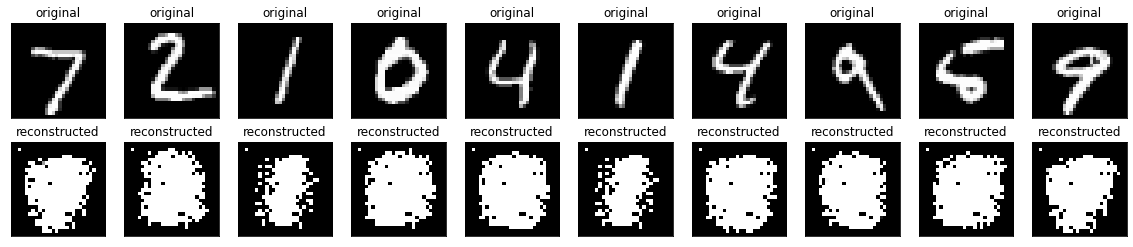

In [93]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


# Autoencoder zur Bildentrauschung

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

In [ ]:
# add noise to data
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

# Faltungs-Autoencoder mit Conv2D-Layern im encoder und Conv2DTranspose-Layern im decoder

In [ ]:
class Denoise(Model):
    def __init__(self):
        super(Denoise,self).__init__()
        self.encoder =tf.keras.Sequential([
            layers.Input(shape=(28,28,1)),
            layers.Conv2D(16,(3,3),activation = 'relu', padding = 'same',strides =2),
            layers.Conv2D(8,(3,3),activation = 'relu', padding = 'same',strides = 2)
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8,kernel_size=3, strides =2, activation = 'relu',padding = 'same'),
            layers.Conv2DTranspose(16,kernel_size=3, strides =2, activation = 'relu',padding = 'same'),
            layers.Conv2D(1, kernel_size=(3,3), activation ='sigmoid', padding = 'same'),
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

In [ ]:
autoencoder.encoder.summary()

In [ ]:
autoencoder.decoder.summary()

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# Anomalieerkennung

In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

In [ ]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)


In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

https://blog.keras.io/building-autoencoders-in-keras.html

# Simplest possible autoencoders

In [7]:
import keras
from keras import layers

# size of encoded representation
encoding_dim =32
# input image
input_img = keras.Input(shape=(784,))
# encoded representation of the input
encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)
# lossy reconstruction of the input
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)
# this model maps an inpit to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [9]:
# encoder model
# this model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [10]:
# decoder model
# this it the encoded input (dim=32)
encoded_input = keras.Input(shape=(encoding_dim,))
#retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
# configure the model
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [12]:
# input data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
# normalize all values between 0 and 1 and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
# train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2729 - val_loss: 0.1861
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1686 - val_loss: 0.1520
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1432 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1279 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1177 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1106 - val_loss: 0.1064
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1055 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1019 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0994 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0975 - val_loss: 0.0955

In [17]:
# visualize reconstructed inputs and encoded representations
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

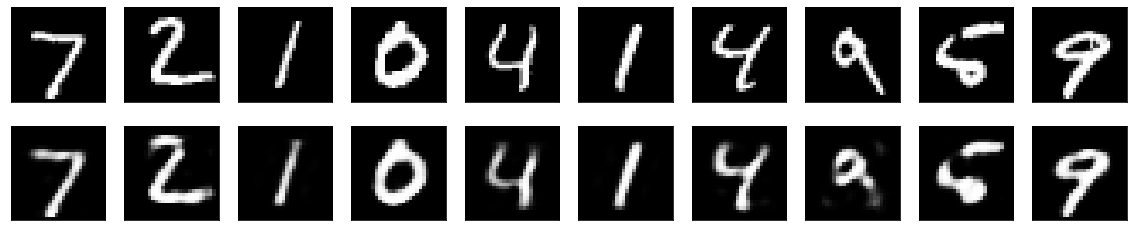

In [18]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Sparsity constraint on the encoded representation

In [20]:
# adding a sparsity constraint on the encoded representations
from keras import regularizers
encoding_dim = 32
input_img = keras.Input(shape=(784,))
#add a dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation = 'relu', activity_regularizer = regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784,activation = 'sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [22]:
# input data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# normalize all values between 0 and 1 and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [24]:
# configure the model
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
# train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
               epochs = 50,
               batch_size = 256,
               shuffle = True,
               validation_data = (x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2875 - val_loss: 0.1991
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1789 - val_loss: 0.1619
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1535 - val_loss: 0.1441
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1394 - val_loss: 0.1325
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1294 - val_loss: 0.1241
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1222 - val_loss: 0.1179
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1170 - val_loss: 0.1136
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1133 - val_loss: 0.1106
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1108 - val_loss: 0.1085
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1091 - val_loss: 0.1071

In [26]:
# visualize reconstructed inputs and encoded representations
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


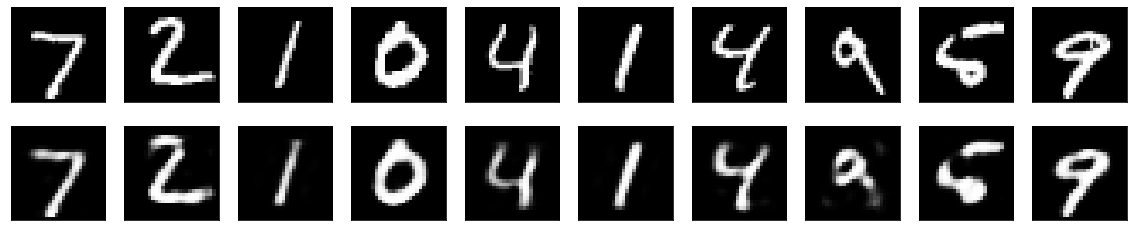

In [27]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Variational Autoencoder (VAE)

= autoencoder, that learns a latent variable model for its input data. Instead of letting the neural network learn an arbitrary function, it is learning the parameters of a probability distribution modeling the data. If you sample points from this distribution, you can generation new input data samples: a VAE is a "generative model".
Encoder turns input samples x into two parameters in a latent space (z_mean, z_log_sigma). Then similar points z are randomly sampled to generate the data (z = z_mena +exp(z_log_sigma)*epsilon). Finally, a decoder network maps these latent space points back to the original input data. 
two loss functions: 
- a reconstruction loss forcing the decoded samples to match the initial inputs
- KL divergence between the learned latent distribution and the prior distribution,-> regularization term. 

In [29]:
# encoder network mapping inputs to latent distribution parameters
original_dim = 28*28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation = 'relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [31]:
# we can use these parameters to sample new similar points from the latent space
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0],latent_dim),mean= 0.,stddev=0.1)
    return z_mean+K.exp(z_log_sigma) * epsilon
z = layers.Lambda(sampling)([z_mean,z_log_sigma])

In [33]:
# we can map these sample latent points back to reconstructed inputs
# create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name = 'encoder')
# create decoder
latent_inputs = keras.Input(shape=(latent_dim,),name='z_sampling')
x = layers.Dense(intermediate_dim, activation = 'relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation = 'sigmoid')(x)
decoder = keras.Model(latent_inputs,outputs, name = 'decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name ='vae_mlp')

3 models were instatiated:
- an end-to-end autoencoder mapping inputs to reconstructions: vae
- an encoder mapping inputs to the latent space: encoder
- a generator that can take points on the latent space and will output the corresponding reconstructed samples: decoder?

In [38]:
# train the model using the end-to-end model, with a custom loss 
# function: the sum of a reconstruction term and the KL divergence regularization term
reconstruction_loss = keras.losses.binary_crossentropy(inputs,outputs)
reconstruction_loss *= original_dim
kl_loss = 1+ z_log_sigma -K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss,axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss+ kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [39]:
# train VAE on MNIST digits:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 553.7571 - val_loss: 499.2685
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 493.9875 - val_loss: 489.9379
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 486.5712 - val_loss: 484.4074
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 481.3523 - val_loss: 480.1939
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 476.6286 - val_loss: 475.0558
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 472.1924 - val_loss: 471.3656
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 468.2741 - val_loss: 467.7118
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 465.0177 - val_loss: 464.0320
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 462.4630 - val_loss: 462.2121
Epoch 10/100
1875/1875 [=============

Epoch 77/100
1875/1875 [==============================] - 3s 2ms/step - loss: 435.0601 - val_loss: 441.9026
Epoch 78/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.8333 - val_loss: 443.1039
Epoch 79/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.7391 - val_loss: 441.2360
Epoch 80/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.6602 - val_loss: 441.4785
Epoch 81/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.5169 - val_loss: 441.7036
Epoch 82/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.4186 - val_loss: 441.1203
Epoch 83/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.2042 - val_loss: 441.7093
Epoch 84/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.1860 - val_loss: 441.1893
Epoch 85/100
1875/1875 [==============================] - 3s 2ms/step - loss: 434.0771 - val_loss: 440.9930
Epoch 86/100
1875/1875 [====

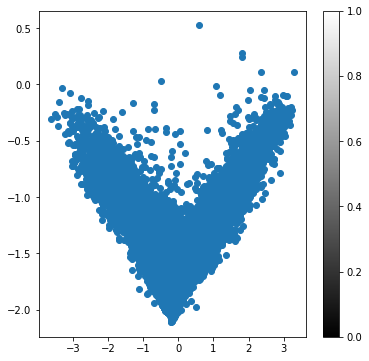

In [47]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:][0], x_test_encoded[:][1])
plt.colorbar()
plt.show()

In [45]:
x_test_encoded[:][0]

array([[ 1.4397974 , -1.6265653 ],
       [-0.4300329 , -0.1418534 ],
       [ 2.1378136 ,  1.8210479 ],
       ...,
       [ 0.68781257, -0.51440924],
       [ 0.29363868,  1.867522  ],
       [-0.5926049 ,  0.71281505]], dtype=float32)

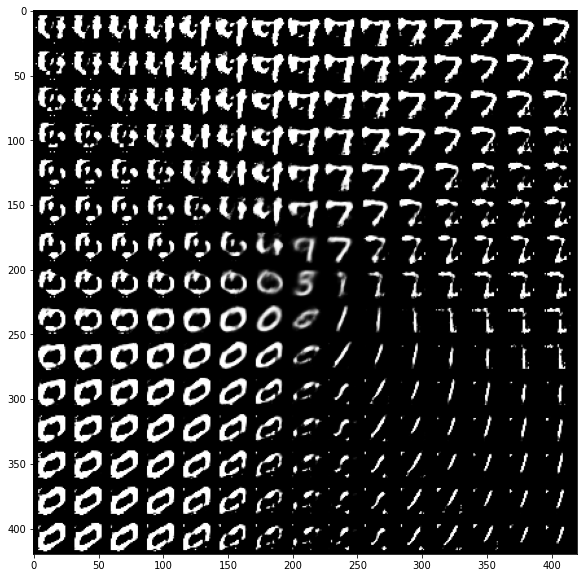

In [48]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


 https://towardsdatascience.com/autoencoders-made-simple-6f59e2ab37ef

In [54]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras import backend as K
import numpy as np

# load and prepare data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28,28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

temp = []
for img in x_train:
    t = []
    for row in img:
        for i in row:
            t.append(i)
    temp.append(t)
x_train = []
x_train = temp

x_train = np.array(x_train)

x_train = x_train.reshape(60000,784)

In [51]:
# build the model

model = Sequential()
model.add(Dense(784, activation = 'relu',input_dim = 784))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(784,activation = 'relu'))

model.compile(loss=keras.losses.mean_squared_error,
             optimizer=keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
             metrics = ['accuracy'])


In [52]:
# train the model and save it
model.fit(x_train,x_train,verbose=1,epochs=10,batch_size=256)
#model.save('C:\\Users\\Rohith\\Documents\\Rohith_Stuff\\Datasets\\auto_en.h5')
#del model

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0540 - accuracy: 0.0105
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0323 - accuracy: 0.0121
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0267 - accuracy: 0.0121
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0240 - accuracy: 0.0122
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0221 - accuracy: 0.0126
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0208 - accuracy: 0.0126
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0198 - accuracy: 0.0125
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0191 - accuracy: 0.0129
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0185 - accuracy: 0.0133
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0180 - accuracy: 0.0137

In [60]:
#model = load_model('C:\\Users\\Rohith\\Documents\\Rohith_Stuff\\Datasets\\auto_en.h5')

test = x_train[1].reshape(1,784)
y_test = model.predict(test)

inp_img = []
temp = []
for i in range(len(test[0])):
    if((i+1)%28 == 0):
        temp.append(test[0][i])
        inp_img.append(temp)
        temp = []
    else:
        temp.append(test[0][i])
out_img = []
temp = []
for i in range(len(y_test[0])):
    if((i+1)%28 == 0):
        temp.append(y_test[0][i])
        out_img.append(temp)
        temp = []
    else:
        temp.append(y_test[0][i])
        
inp_img = np.array(inp_img)
out_img = np.array(out_img)
        

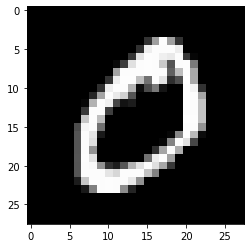

In [58]:
plt.imshow(inp_img)

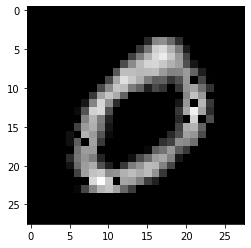

In [59]:
plt.imshow(out_img)

https://keras.io/examples/generative/vae/

# Variational AutoEncoder

In [9]:
# Setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# Create a sampling layer
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [11]:
# build the encoder
latent_dim =2 
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 3136)         0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [12]:
# build the decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [24]:
class VAE(keras.Model):
    def __init__(self,encoder, decoder, **kwargs):
        super(VAE,self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name='total_loss')
        self.reconstruction_loss_tracker = keras.metrics.Mean(name='reconstruction_loss')
        self.kl_loss_tracker = keras.metrics.Mean(name='kl_loss')
    
    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
    def train_step(self,data, test=1):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            add_loss = tf.reduce_mean(test)
            print('test',add_loss)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }           
            
            
            
            

In [25]:
# train the VAE

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=1, batch_size=128)

test Tensor("Mean:0", shape=(), dtype=int32)
test Tensor("Mean:0", shape=(), dtype=int32)
547/547 [==============================] - 11s 20ms/step - loss: 154.5162 - reconstruction_loss: 147.3670 - kl_loss: 6.4798


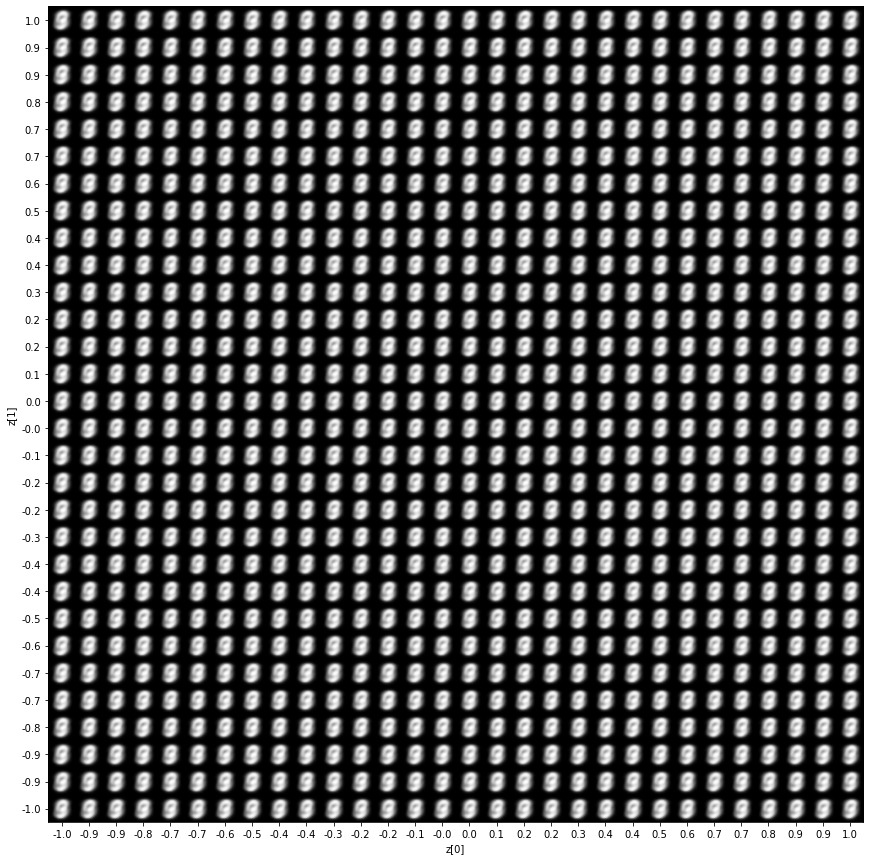

In [86]:
#Display a grid of sampled digits
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)